In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#to build statistical models
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [80]:
#•	ICO – Name of the firm.
#•	Token – Name of token.
#•	Softcap – The venture may set a softcap, which is the minimum amount to be raised. If this amount is not hit, the project is not launched, and funds are usually returned to investors.
#•	Hardcap – The venture usually sets a hardcap, which is the maximum amount to be raised by the project. 
#•	Start – Start date of ICO.
#•	End – End date of ICO.
#•	Quarterstart – Quarter when the project started.
#•	Duration of offering – The length of the campaign, and defined in days between the ICO start and end date.
#•	Country – Country of registration of the token.
#•	Category – Companies choose among 29 industry categories determined by icobench.com which shows the future sphere of activity. The number of categories the ICO falls into is a measure for diversification. A high number of industries is an indicator of the broader areas of future usage of a company’s products. 
#•	ERC20 – Ethereum is the prominent platform for conducting ICOs. The Ethereum standard (ERC20) provides a set of rules for transfer tokens, and investors may recognize ICOs using Ethereum’s infrastructure safer than other token exchange platform. ERC20 is 1 if ICOs build on ERC20 Blockchain and 0 if the project uses its own or other technology.
#•	Rating – Experts’ rating for business ventures from zero to five, zero being the lowest and five being the highest quality of ICO.
#•	Number of experts – The number of experts providing ratings.
#•	Bonus – 1 if a bonus is offered to early investors, 0 otherwise. 
#•	Policy – kyc if the project implemented a Know Your Customer (KYC) policy only, whitelist if the project implemented a whitelist policy only, kyc&whitelist if both KYC and whitelist policies implemented, 0 otherwise. KYC policy requires the potential investors provide information to verify their identity. Whitelist policy requires registration for participation.
#•	Presale – 1 if a presale is carried out before the main crowdsale, 0 otherwise.
#•	Number of team members – A large team creates trust in the investors, believing that there will be enough people to carry out the project. As the number of contacts increases, there will be more contributions to the project’s future endeavors.
#•	Distributed in ICO – The ratio of the tokens offered in sales to the total supply of tokens. This ratio is indicative of how successful the ICO will be in terms of the trust it creates in the market. The more tokens a venture retains ownership share, the more quality it signals. 
#•	US restriction –  1 if ICOs do not accept US-based investors and 0 otherwise. 
#•	Restricted countries – Countries that are not admitted to take part in ICO. 
#•	Accepted fiat – 1 if investors could buy tokens with fiat currencies (Dollar, Euro, Yuan, and other government-issued currencies) and 0 if otherwise.
#•	Major cryptocurrencies - 1 if investors could buy tokens only with four major cryptocurrencies, i.e., Bitcoin, Ethereum, Litecoin, and Ripple.
#•	Amount raised – The amount raised in ICO.


In [3]:
#PART 1 DESCRIPTIVE ANALYTICS

In [4]:
ico_data_top = pd.read_csv('ICO_Data.csv')
ico_data_top.tail(20)


,ICO,Token,Softcap,Hardcap,Start,End,Quarterstart,Duration of offering,Country,Category,...,Bonus,Policy,Number of team members,Distributed in ICO,US restriction,Restricted countries,Accepted fiat,Major cryptocurrencies,Presale,Amount raised
2298,pchain,PAI,NaN,NaN,5/28/2018,5/28/2018,2018q2,1.0,China,Cryptocurrency,...,0,0,10.0,0.350,NaN,NaN,0,1,0,26674000
2299,shipchain,SHIP,NaN,NaN,1/8/2018,1/8/2018,2018q1,1.0,USA,Other,...,0,0,11.0,0.000,NaN,NaN,0,0,0,30000000
2300,verify,CRED,1500000,14500000.0,12/6/2017,12/6/2017,2017q4,1.0,Singapore,"Platform,Banking",...,0,0,6.0,0.000,NaN,NaN,0,1,0,2500000
2301,fysical,FYS,559280,5100000.0,2/25/2019,2/25/2019,2019q1,1.0,Singapore,BigData,...,0,kyc&whitelist,8.0,0.400,1.0,"USA, China",0,1,0,1800000
2302,hashgard,GARD,NaN,NaN,6/21/2018,6/21/2018,2018q2,1.0,China,Platform,...,0,0,12.0,0.000,NaN,NaN,0,0,0,20000000
2303,mainframe,0,NaN,NaN,2/26/2018,2/26/2018,2018q1,1.0,UK,Platform,...,0,0,12.0,0.000,NaN,NaN,0,0,0,25656000
2304,merculet,0,NaN,NaN,5/4/2018,5/4/2018,2018q2,1.0,NaN,Other,...,0,0,10.0,0.000,NaN,NaN,0,0,0,28282320
2305,nkn,0,NaN,6835360.0,4/19/2018,4/19/2018,2018q2,1.0,USA,Other,...,0,0,6.0,0.000,NaN,NaN,0,0,0,17596008
2306,zeepin,ZPT,NaN,70000000.0,1/18/2018,1/18/2018,2018q1,1.0,Singapore,Platform,...,0,0,7.0,0.500,NaN,NaN,0,0,0,59858852
2307,covalent-coin,VALENT,NaN,NaN,NaN,NaN,1900q1,NaN,Russia,"Cryptocurrency,Manufacturing",...,0,0,NaN,0.000,NaN,NaN,0,0,0,NaN


In [5]:
ico_data_top.isnull()

,ICO,Token,Softcap,Hardcap,Start,End,Quarterstart,Duration of offering,Country,Category,...,Bonus,Policy,Number of team members,Distributed in ICO,US restriction,Restricted countries,Accepted fiat,Major cryptocurrencies,Presale,Amount raised
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,False,False,True,True,False,False,False,False,False,False,...,False,False,True,False,True,True,False,False,False,False
2314,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2315,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2316,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [83]:
#Creating a new dataframe and renaming columns for ease
ico_data = pd.DataFrame()
ico_data['ICO'] = ico_data_top['ICO']
ico_data['Token'] = ico_data_top['Token']
ico_data['Softcap'] = ico_data_top['Softcap']
ico_data['Hardcap'] = ico_data_top['Hardcap']
ico_data['Start'] = ico_data_top['Start']
ico_data['End'] = ico_data_top['End']
ico_data['Quarterstart'] = ico_data_top['Quarterstart']
ico_data['Duration'] = ico_data_top['Duration of offering']
ico_data['Country'] = ico_data_top['Country']
ico_data['Category'] = ico_data_top['Category']
ico_data['ERC20'] = ico_data_top['ERC20']
ico_data['Rating'] = ico_data_top['Rating']
ico_data['#Experts'] = ico_data_top['Number of experts']
ico_data['Bonus'] = ico_data_top['Bonus']
ico_data['Policy'] = ico_data_top['Policy']
ico_data['#Teammembers'] = ico_data_top['Number of team members']
ico_data['Distribution'] = ico_data_top['Distributed in ICO']
ico_data['US_Restriction'] = ico_data_top['US restriction']
ico_data['Restricted_Countries'] = ico_data_top['Restricted countries']
ico_data['Accepted_fiat'] = ico_data_top['Accepted fiat']
ico_data['Major_Currencies'] = ico_data_top['Major cryptocurrencies']
ico_data['Presale'] = ico_data_top['Presale']
ico_data['Amount_Raised'] = ico_data_top['Amount raised']
ico_data.head()
print('Data Frame Created')

Data Frame Created


In [84]:
# we did this to see the null values that we have in this data 
# as we can see there are a lot of null values
# the most Null values are in:
#Softcap,Hardcap, US_restriction,Restricted Countries, Distribution
# we cannot simply drop them all
# that would significantly decrease data set size.
ico_data.isnull().sum()

ICO                        0
Token                     26
Softcap                 1100
Hardcap                  501
Start                      9
End                        7
Quarterstart               0
Duration                  10
Country                   65
Category                  58
ERC20                      0
Rating                     3
#Experts                   3
Bonus                      0
Policy                     0
#Teammembers             175
Distribution             480
US_Restriction          1394
Restricted_Countries    1393
Accepted_fiat              0
Major_Currencies           0
Presale                    0
Amount_Raised              1
dtype: int64

In [85]:
ico_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ICO                   2318 non-null   object 
 1   Token                 2292 non-null   object 
 2   Softcap               1218 non-null   object 
 3   Hardcap               1817 non-null   float64
 4   Start                 2309 non-null   object 
 5   End                   2311 non-null   object 
 6   Quarterstart          2318 non-null   object 
 7   Duration              2308 non-null   float64
 8   Country               2253 non-null   object 
 9   Category              2260 non-null   object 
 10  ERC20                 2318 non-null   int64  
 11  Rating                2315 non-null   float64
 12  #Experts              2315 non-null   float64
 13  Bonus                 2318 non-null   int64  
 14  Policy                2318 non-null   object 
 15  #Teammembers         

In [86]:
#making amount raised a float variable.
#we can deduce that the amount raised is dependent on all the variables
# the amount raised is in this case our Y variable.
# all the others are X variables.
ico_data['Amount_Raised']= ico_data['Amount_Raised'].astype('float')
print('Amount_Raised is now a float variable')

Amount_Raised is now a float variable


<AxesSubplot:xlabel='Major_Currencies', ylabel='Bonus'>

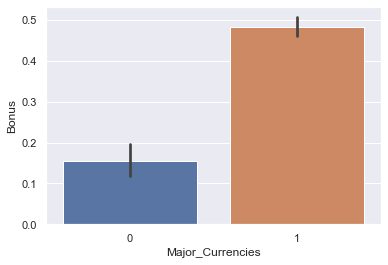

In [87]:
sn.barplot(x='Major_Currencies', y='Bonus', data = ico_data)

<AxesSubplot:xlabel='Major_Currencies', ylabel='Presale'>

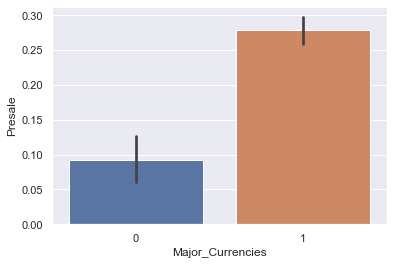

In [88]:
sn.barplot(x='Major_Currencies', y='Presale', data = ico_data)

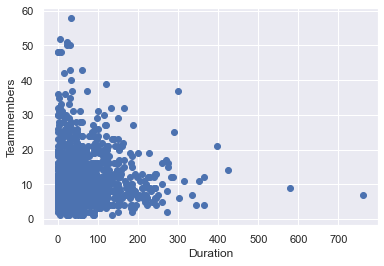

In [89]:
plt.scatter(x= ico_data['Duration'], y = ico_data['#Teammembers'])
plt.xlabel('Duration')
plt.ylabel('Teammembers')
plt.show()

an upward trend is observed


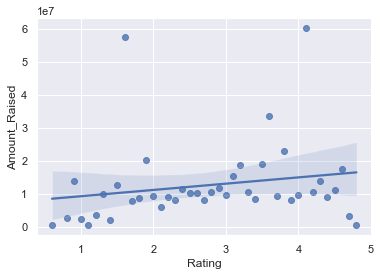

In [90]:
ico_by_country = ico_data.groupby('Rating')['Amount_Raised'].mean().reset_index()
ico_by_country
sn.regplot(x='Rating', y='Amount_Raised', data=ico_by_country)
print('an upward trend is observed')

a downward trend is observed


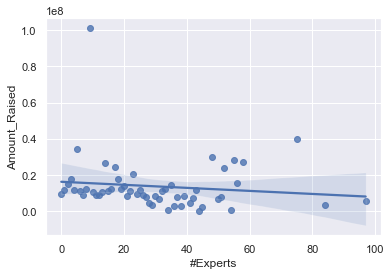

In [91]:
ico_by_exp = ico_data.groupby('#Experts')['Amount_Raised'].mean().reset_index()
ico_by_exp
sn.regplot(x='#Experts', y='Amount_Raised', data=ico_by_exp)
print('a downward trend is observed')

an upward trend is observed


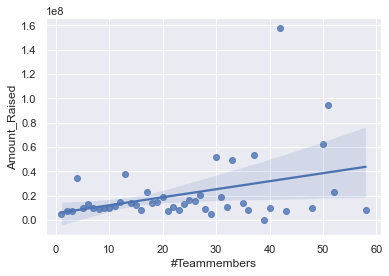

In [92]:
ico_by_team = ico_data.groupby('#Teammembers')['Amount_Raised'].mean().reset_index()
ico_by_team
sn.regplot(x='#Teammembers', y='Amount_Raised', data=ico_by_team)
print('an upward trend is observed')

an steady trend is observed


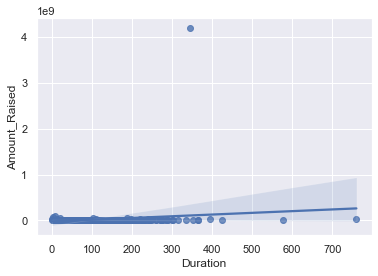

In [93]:
ico_by_duration = ico_data.groupby('Duration')['Amount_Raised'].mean().reset_index()
ico_by_duration
sn.regplot(x='Duration', y='Amount_Raised', data=ico_by_duration)
print('an steady trend is observed')

an steady trend is observed


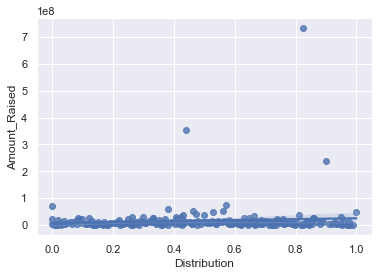

In [94]:
ico_by_distribution = ico_data.groupby('Distribution')['Amount_Raised'].mean().reset_index()
ico_by_distribution
sn.regplot(x='Distribution', y='Amount_Raised', data=ico_by_distribution)
print('an steady trend is observed')

In [95]:
ico_data.US_Restriction

0       NaN
1       1.0
2       NaN
3       1.0
4       0.0
       ... 
2313    NaN
2314    NaN
2315    NaN
2316    NaN
2317    NaN
Name: US_Restriction, Length: 2318, dtype: float64

In [96]:
#we will replace US_Restriction NaN values with 0 assuming there is no restriction
# treating Nan Values with 0---> meaning they are not restricted in US
ico_data_edit =pd.DataFrame()
ico_data_edit = ico_data
print('new data frame created')

new data frame created


In [97]:
ico_data_edit['US_Restriction'] = ico_data_edit['US_Restriction'].replace(np.nan,0)
print('replaced nan values with 0 to signify no US restriction')

replaced nan values with 0 to signify no US restriction


In [98]:
#first we will replace the #REF! rows with nan, because it is not convertable to float
ico_data_edit = ico_data_edit.replace('#REF!', np.nan, regex=True)
print('#REF! rows have been replaced with NaN')

#REF! rows have been replaced with NaN


In [99]:
#changing data type to float to be able to run regression
ico_data_edit['Softcap']= ico_data_edit['Softcap'].astype('float')
ico_data_edit['Hardcap']= ico_data_edit['Hardcap'].astype('float')
print('Softcap and Hardcap have been converted to float')

Softcap and Hardcap have been converted to float


In [100]:
ico_by_country = ico_data.groupby('Country')['Amount_Raised'].mean()
ico_by_country

Country
Afghanistan     21000000.0
Andorra               81.0
Anguilla         6208000.0
Argentina       11300000.0
Armenia          1575000.0
                  ...     
Vanuatu         19110000.0
Venezuela      735000000.0
Vietnam          3330059.4
Zimbabwe        12271090.5
russia           9800000.0
Name: Amount_Raised, Length: 107, dtype: float64

In [101]:
# if there is no minimum amount---> The project will not be launched
ico_data_edit['Softcap'] = ico_data_edit['Softcap'].replace(np.nan,0)
ico_data_edit['Hardcap'] = ico_data_edit['Hardcap'].replace(np.nan,0)
print('replaced empty softcap and hardcap rows with 0')

# we will now replace nan values in Duration with mean 
ico_data_edit["Duration"].fillna(ico_data_edit['Duration'].mean(),inplace=True)
print('replaced NaN values in Duration with average duration')

#we will now replace nan values in Teammembers and Experts with mean 
ico_data_edit["#Teammembers"].fillna(ico_data_edit['#Teammembers'].mean(),inplace=True)
ico_data_edit["#Experts"].fillna(ico_data_edit['#Experts'].mean(),inplace=True)
print('replaced nan values in experts and teammembers with average number of teammembers and experts')

#we will now replace nan values in Rating with mean 
ico_data_edit["Rating"].fillna(ico_data_edit['Rating'].mean(),inplace=True)
print('replaced NaN values in Rating with average Rating')

#we will now replace nan values in Distribution with mean 
ico_data_edit["Distribution"].fillna(ico_data_edit['Distribution'].mean(),inplace=True)
print('replaced NaN values in Distribution with average Distribution')

# we will have to drop the 26 rows for Token, because we cannot define a token by ourselves
#first we replaced the blank token rows with nan 
ico_data_edit['Token'] = ico_data_edit['Token'].replace('', np.nan, regex=True)
# now we dropped the nan rows
ico_data_edit.dropna(subset = ['Token'], inplace=True)
print('dropped 26 rows in Token')

#we will replace the NaN values in Restriced countries with "None" because:
# we take the underlying assumption that NaN for restricted countries = NO Restricted countries
ico_data_edit['Restricted_Countries'] = ico_data_edit['Restricted_Countries'].replace(np.nan,'None')
print('replaced nan values with "None" to signify no country is restricted')

# we will replace the NaN value in Amount Raised with the mean of the amount raised of Country---> Russia
#because the data row is that of Russia, the most accurate mean we can add is that of russia.
#ico_data_edit['Restricted_Countries'] = ico_data_edit['Restricted_Countries'].replace(np.nan,9800000.0)


replaced empty softcap and hardcap rows with 0
replaced NaN values in Duration with average duration
replaced nan values in experts and teammembers with average number of teammembers and experts
replaced NaN values in Rating with average Rating
replaced NaN values in Distribution with average Distribution
dropped 26 rows in Token
replaced nan values with "None" to signify no country is restricted


In [102]:
#dropping start and end entries
# we notice that 8 out of the 9 NaN values in Start are also in End
#Hence dropping the Start rows also drops the End rows, except for 1
# we then drop that 1 as well.
# after dropping these we still have 2282 entries left, so most of the data is still there.
ico_data_edit['Start'] = ico_data_edit['Start'].replace('', np.nan, regex=True)
ico_data_edit.dropna(subset = ['Start'], inplace=True)
ico_data_edit['End'] = ico_data_edit['End'].replace('', np.nan, regex=True)
ico_data_edit.dropna(subset = ['End'], inplace=True)
print('dropped empty rows in Start and End columns')

dropped empty rows in Start and End columns


In [103]:
#replacing the NaN values in Country with None, and so we have another country type = None
# Meaning no country is assigned to it
ico_data_edit['Country'] = ico_data_edit['Country'].replace('', np.nan, regex=True)
ico_data_edit['Country'] = ico_data_edit['Country'].replace(np.nan,'None')
ico_data_edit['Category'] = ico_data_edit['Category'].replace(np.nan,'None')
print('replaced empty Country rows with None to signify no designated country--> A new country type = None')

replaced empty Country rows with None to signify no designated country--> A new country type = None


In [104]:
print('now we have taken care of all of the Null values')
print('the data is now ready for clustering analysis to take place.')
ico_data_edit.isnull().sum()


now we have taken care of all of the Null values
the data is now ready for clustering analysis to take place.


ICO                     0
Token                   0
Softcap                 0
Hardcap                 0
Start                   0
End                     0
Quarterstart            0
Duration                0
Country                 0
Category                0
ERC20                   0
Rating                  0
#Experts                0
Bonus                   0
Policy                  0
#Teammembers            0
Distribution            0
US_Restriction          0
Restricted_Countries    0
Accepted_fiat           0
Major_Currencies        0
Presale                 0
Amount_Raised           0
dtype: int64

In [105]:
predictors = ['ICO', 'Token', 'Softcap', 'Hardcap', 'Start','End','Quarterstart','Duration','Country','ERC20','Rating','#Experts','Bonus','Policy','#Teammembers','Distribution','US_Restriction','Restricted_Countries','Accepted_fiat','Major_Currencies','Presale']
outcome = ['Amount_Raised']
X_df = pd.get_dummies(ico_data_edit[predictors], drop_first = True)
X = sm.add_constant(X_df)
Y = ico_data_edit[outcome]
X
print('Dummies created')

Dummies created


In [106]:
train_X, test_X, train_Y , test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 30)
print('we picked a test size of %30 for this particular case.')
print('we need to have atleast %70 for training the data to be able to have more hands on data to work with')
print('data has been split to train and test')

we picked a test size of %30 for this particular case.
we need to have atleast %70 for training the data to be able to have more hands on data to work with
data has been split to train and test


In [107]:
# PART 2: CLUSTERING TO DETERMINE SUCCESS OF IPOS

In [108]:
print('we will use the data frame from part 1 because we have already manipulated the data to clean the data')
# we will now continue to manipulate it here.
ico_cluster = pd.DataFrame()
ico_cluster = ico_data_edit
ico_cluster.info()
print('new Data Frame created')

we will use the data frame from part 1 because we have already manipulated the data to clean the data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2282 entries, 0 to 2316
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ICO                   2282 non-null   object 
 1   Token                 2282 non-null   object 
 2   Softcap               2282 non-null   float64
 3   Hardcap               2282 non-null   float64
 4   Start                 2282 non-null   object 
 5   End                   2282 non-null   object 
 6   Quarterstart          2282 non-null   object 
 7   Duration              2282 non-null   float64
 8   Country               2282 non-null   object 
 9   Category              2282 non-null   object 
 10  ERC20                 2282 non-null   int64  
 11  Rating                2282 non-null   float64
 12  #Experts              2282 non-null   float64
 13  Bonus                

In [109]:
#the question says:
#An ICO is considered to be successful if it hits its softcap (if any) 
#or the amount of money raised is more than $0.5 million in the absence of a softcap, and unsuccessful otherwise
# lets create a new column called ICO_success

In [110]:
soft = ico_cluster.Softcap.values
amt = ico_cluster.Amount_Raised.values

def success (soft,amt): 
    if soft > 0 or amt> 500000:
        return 1
    else:
        return 0
suc=[]
for i in range(len(soft)):
    suc.append(success(soft[i],amt[i]))
suc=np.array(suc)
ico_cluster['Success']=suc   
ico_cluster.head()

print('New column Success created based on Softcap and Amount_Raised')

New column Success created based on Softcap and Amount_Raised


In [111]:
#i)	Report which variables you include in your analysis, 
#explain if you manipulate the data (i.e., categorical variables, new features, etc.)
# to know which variables to use in our analysis
# we will have to do some kind of regression to find out the variables that are important.
ico_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2282 entries, 0 to 2316
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ICO                   2282 non-null   object 
 1   Token                 2282 non-null   object 
 2   Softcap               2282 non-null   float64
 3   Hardcap               2282 non-null   float64
 4   Start                 2282 non-null   object 
 5   End                   2282 non-null   object 
 6   Quarterstart          2282 non-null   object 
 7   Duration              2282 non-null   float64
 8   Country               2282 non-null   object 
 9   Category              2282 non-null   object 
 10  ERC20                 2282 non-null   int64  
 11  Rating                2282 non-null   float64
 12  #Experts              2282 non-null   float64
 13  Bonus                 2282 non-null   int64  
 14  Policy                2282 non-null   object 
 15  #Teammembers         

In [112]:
p = ['Softcap','Hardcap','Duration','ERC20','Rating','#Experts','Bonus','#Teammembers','Distribution','US_Restriction','Accepted_fiat','Major_Currencies','Presale','Amount_Raised']
o = ['Success']
x_df = pd.get_dummies(ico_cluster[p], drop_first = True)
x = sm.add_constant(x_df)
y = ico_data_edit[o]
x
print('dummies created')

dummies created


In [113]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.8, random_state = 45)
print('data split into train and test')

data split into train and test


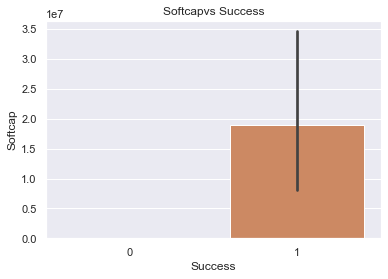

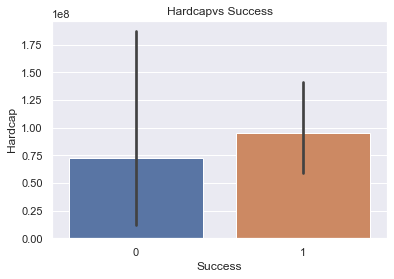

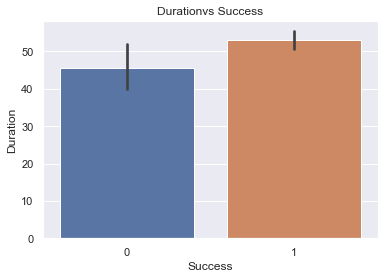

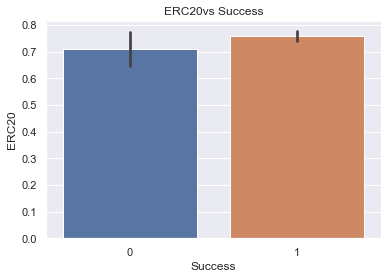

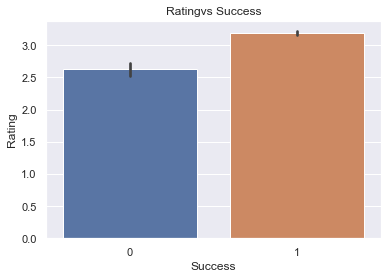

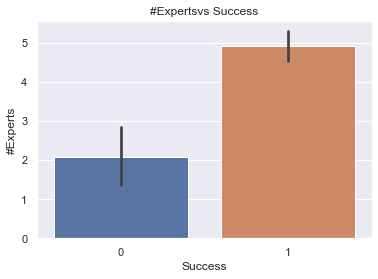

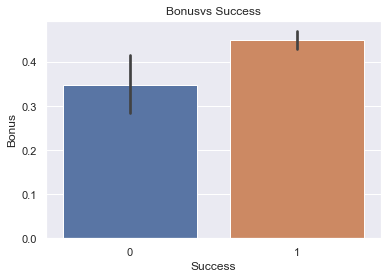

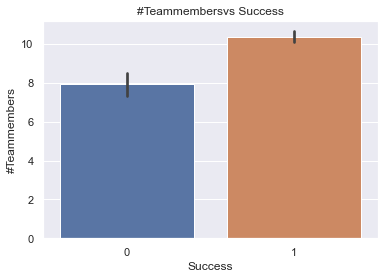

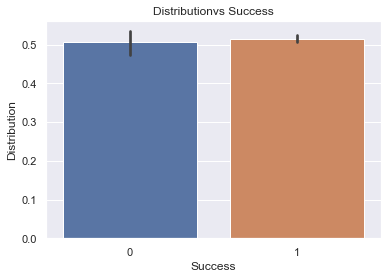

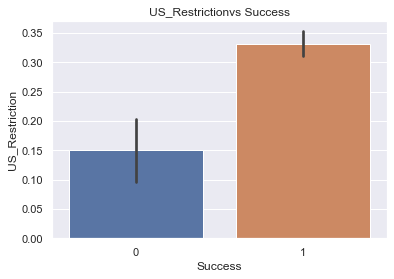

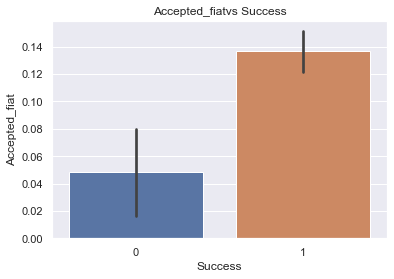

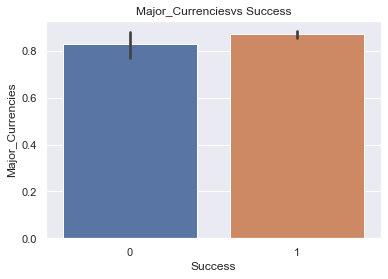

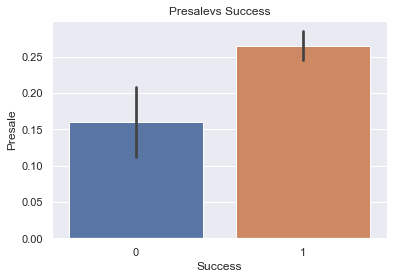

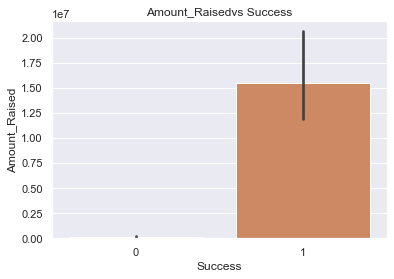

In [114]:
d = ['Softcap','Hardcap','Duration','ERC20','Rating','#Experts','Bonus','#Teammembers','Distribution','US_Restriction','Accepted_fiat','Major_Currencies','Presale','Amount_Raised']
def bar (din):
    plt.figure()
    sn.barplot(ico_cluster.Success,ico_cluster[din])
    plt.title(din + 'vs Success');plt.ylabel(din);plt.xlabel('Success')    
for i in range(14):
    bar(d[i])

In [115]:
print('we can see that Softcap is  an important variable as we already knew it based on the condition of success')
print('if a softcap existed the project was carried through')


print('we can see that Hardcap is not an important variable as it  does not tell us about the impact on Success')
print('the success is slightly higher when hardcap is higher, but not significantly, so:')
print('it does not give us strong key differences that we can use to significantly differentiate and clearly identify its impact on success')

print('we can see that Duration is not an important variable as it does not tells us about the impact on Success')
print('Not success and Success are more or less similar regardless of duration.')
print('it does not give us strong key differences that we can use to significantly differentiate and clearly identify its impact on success.')


print('we can see that ERC is not an important variable as it does not tell us about the impact on Success,')
print('if the ICO is built on ethereums platform and not on its own technology:')
print('the success is more or less the same if its built on ethereums platform or on its own technology')
print('it does not give us strong key differences that we can use to significantly differentiate and clearly identify its impact on success.')

print('we can see that Ratings is a significant variable, as the graph shows us that, the projects that were determined as success')
print('were on average a higher rating than unsuccessful. The higher the rating the more likely the ICO is determined to be successful.')

print('we can see that #experts is an important variable as the number of experts increases, so does the frequency of Success for the ICO')

print('we can see that Bonus is an important variable because the difference between success and not success is apparent')
print('bonuses are given out on average more for successful ICOS')


print('we can see that #Teammembers is an important variable as the number of Teammembers increases, so does the frequency of Success for the ICO')

print('we can see that Distribution is not an important variable the distribution is the same regardless of success or not success there is no difference whatsoever')

print('we can see that #US_Restriction is an important variable the ICOs that are successful exhibit a much higher US Restriction')

print('we can see that #Accepted_fiat is an important variable the ICOs that are successful exhibit a much higher Accepted_fiat')

print('we can see that Major_Currencies is not an important variable')
print('the Major_Currencies is the same regardless of success or not success')
print('there is no difference whatsoever')

print('we can see that Presale is an important variable')
print('If the Presale for an ICO occurred it is more likely a successful ICO')

print('Amount_Raised is an important variable but we already knew that because it was one of the determinants for determining Success')
print('if an ICO had an amount raise >500,000 in the absence of a Softcap it was deemed a success')
print('and still inspite of that if there was no amount raised the ICO was not a success')
print('for success there had to be some sort of Amount_Raised')

we can see that Softcap is  an important variable as we already knew it based on the condition of success
if a softcap existed the project was carried through
we can see that Hardcap is not an important variable as it  does not tell us about the impact on Success
the success is slightly higher when hardcap is higher, but not significantly, so:
it does not give us strong key differences that we can use to significantly differentiate and clearly identify its impact on success
we can see that Duration is not an important variable as it does not tells us about the impact on Success
Not success and Success are more or less similar regardless of duration.
it does not give us strong key differences that we can use to significantly differentiate and clearly identify its impact on success.
we can see that ERC is not an important variable as it does not tell us about the impact on Success,
if the ICO is built on ethereums platform and not on its own technology:
the success is more or less the sa

Heatmap below


<AxesSubplot:>

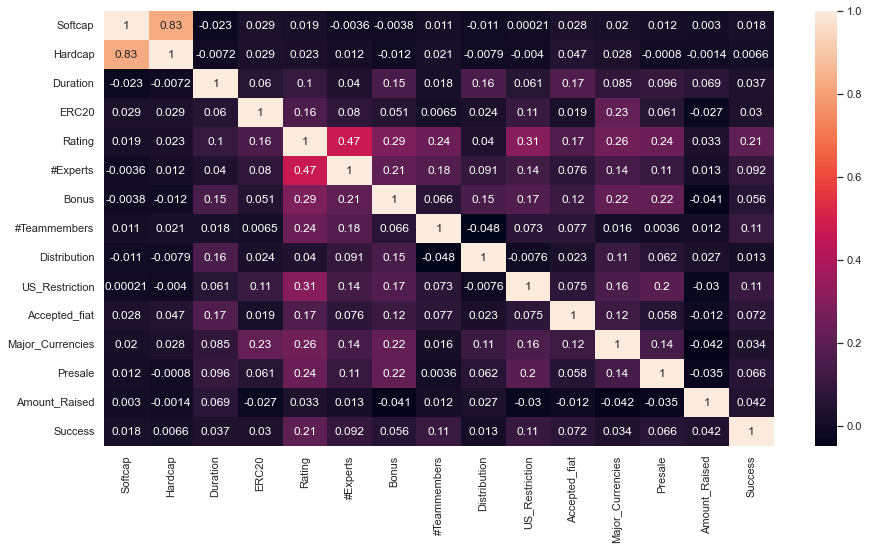

In [116]:
print('Heatmap below')
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(ico_cluster.corr(), annot = True)

In [117]:
print('we will use the K Means clustering method, and we will use the elbow method to find the optimal number of clusters.')

we will use the K Means clustering method, and we will use the elbow method to find the optimal number of clusters.


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_ico_cluster = scaler.fit_transform( ico_cluster[['Softcap','Rating','#Experts','Bonus','#Teammembers','US_Restriction','Accepted_fiat','Presale','Amount_Raised']] )
#'Softcap,'Hardcap','Duration','ERC20','Rating','#Experts','Bonus','#Teammembers','Distribution','US_Restriction','Accepted_fiat','Major_Currencies','Presale','Amount_Raised'
print('Parameters Have Been Scaled')

Parameters Have Been Scaled


Finding Optimal Number of Clusters Using Elbow Method


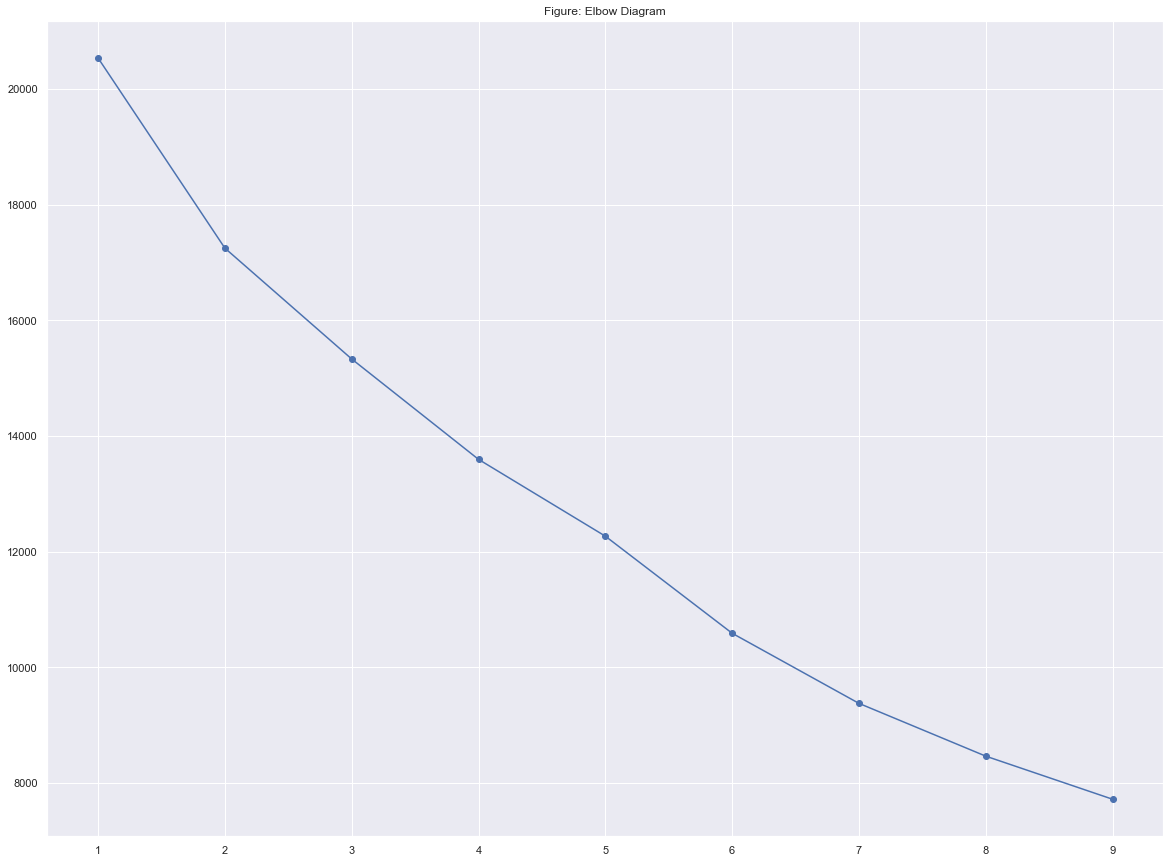

In [119]:
print('Finding Optimal Number of Clusters Using Elbow Method')
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_ico_cluster )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(20,15))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Figure: Elbow Diagram");

In [120]:
print('we can see that the elbow is forming at 2 so our K=2')

k = 2
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_ico_cluster )
ico_cluster["clusterid"] = clusters.labels_
print('cluster lables created')

we can see that the elbow is forming at 2 so our K=2
cluster lables created


In [121]:
ico_cluster[ico_cluster.clusterid == 0]

,ICO,Token,Softcap,Hardcap,Start,End,Quarterstart,Duration,Country,Category,...,#Teammembers,Distribution,US_Restriction,Restricted_Countries,Accepted_fiat,Major_Currencies,Presale,Amount_Raised,Success,clusterid
1,remecoin,REME,0.0,141270000.0,3/15/2018,6/14/2018,2018q1,91.0,Liechtenstein,"Internet,Businessservices",...,21.0,0.512724,1.0,"China, USA",1,1,0,9558576.0,1,0
3,zeon-network,ZEON,2000000.0,15000000.0,6/8/2018,10/8/2018,2018q2,122.0,Estonia,"Platform,Investment,Cryptocurrency,Banking,Sma...",...,7.0,0.600000,1.0,USA,1,1,1,700000.0,1,0
4,worldopo,WPT,0.0,0.0,8/17/2018,3/2/2019,2018q3,197.0,Liechtenstein,"VirtualReality,SmartContract,Entertainment,Art...",...,12.0,0.750000,0.0,North Korea,1,1,0,3392000.0,1,0
5,htfx,HTF,282000.0,383000.0,4/23/2018,7/4/2018,2018q2,72.0,Belize,None,...,9.0,0.135900,1.0,"USA, UK, Japan, Singapore, China",1,1,1,223869.0,1,0
6,must,MUST,6700000.0,14000000.0,11/1/2018,12/31/2019,2018q4,425.0,Estonia,"Platform,Legal,Infrastructure",...,14.0,0.700000,0.0,None,1,1,1,4760000.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,coinfi,COF,0.0,15000000.0,1/10/2018,1/10/2018,2018q1,1.0,Hong Kong,Platform,...,8.0,0.500000,1.0,US citizens excluded,0,1,1,15000000.0,1,0
2253,selfkey,KEY Token,2500000.0,21780000.0,1/14/2018,1/14/2018,2018q1,1.0,Cayman Islands,Businessservices,...,48.0,0.330000,0.0,None,0,0,0,21780000.0,1,0
2285,noia-network,NOIA,0.0,6600000.0,7/4/2019,7/4/2019,2019q3,1.0,Gibraltar,"Infrastructure,Internet",...,12.0,0.300000,1.0,"USA, China, Japan",0,1,0,6600000.0,1,0
2288,edenchain,EDN,0.0,0.0,5/25/2018,5/25/2018,2018q2,1.0,South Korea,Platform,...,9.0,0.400000,1.0,"USA, China, Iran",0,1,0,24000000.0,1,0


In [122]:
ico_cluster[ico_cluster.clusterid == 1]

,ICO,Token,Softcap,Hardcap,Start,End,Quarterstart,Duration,Country,Category,...,#Teammembers,Distribution,US_Restriction,Restricted_Countries,Accepted_fiat,Major_Currencies,Presale,Amount_Raised,Success,clusterid
0,russianminercoin,RMC,0.0,100000000.0,8/28/2017,9/27/2019,2017q3,760.0,Russia,"Cryptocurrency,BigData",...,7.000000,0.512724,0.0,None,1,1,1,43000000.0,1,1
2,emiba,EMB,15000000.0,21000000.0,6/1/2018,12/31/2019,2018q2,578.0,Russia,Manufacturing,...,9.000000,0.580000,0.0,None,1,1,0,7012829.0,1,1
8,dragonglass,DGS,0.0,28326300.0,2/16/2018,3/16/2018,2018q1,28.0,Estonia,"Cryptocurrency,Entertainment,Software",...,4.000000,1.000000,1.0,USA,0,1,0,1000000.0,1,1
10,taucoin,TAU,0.0,0.0,10/18/2018,10/18/2019,2018q4,365.0,Cyprus,Cryptocurrency,...,4.000000,0.512724,1.0,"USA, China",0,0,0,10000000.0,1,1
12,laocon,LC,10000000.0,100000000.0,10/1/2018,12/31/2018,2018q4,91.0,Singapore,"BigData,ArtificialIntelligence,Businessservice...",...,5.000000,0.400000,0.0,None,0,1,0,500.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,hero-node,0,0.0,21800000.0,5/17/2018,5/17/2018,2018q2,1.0,China,Platform,...,10.000000,0.400000,0.0,None,0,0,0,21765720.0,1,1
2313,olympus-labs,MOT,0.0,0.0,1/14/2018,1/14/2018,2018q1,1.0,USA,Other,...,10.178721,0.382000,0.0,None,0,0,0,60324750.0,1,1
2314,trinity,TNC,0.0,20000000.0,1/14/2018,1/14/2018,2018q1,1.0,China,"Platform,Other",...,7.000000,0.000000,0.0,None,0,0,0,20000000.0,1,1
2315,chainlink,LINK,0.0,0.0,9/19/2017,9/19/2017,2017q3,1.0,USA,Platform,...,2.000000,0.000000,0.0,None,0,1,0,32000000.0,1,1


In [123]:
cluster_features = ico_cluster.groupby('clusterid').agg( ["mean"] ).reset_index().round(2)
cluster_features

,clusterid,Softcap,Hardcap,Duration,ERC20,Rating,#Experts,Bonus,#Teammembers,Distribution,US_Restriction,Accepted_fiat,Major_Currencies,Presale,Amount_Raised,Success
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,19695759.93,92190969.77,62.28,0.81,3.68,8.84,0.74,12.05,0.54,0.56,0.24,0.97,0.48,9528035.70,0.96
1,1,15571701.31,93671788.03,44.86,0.71,2.73,1.51,0.21,8.76,0.50,0.13,0.05,0.79,0.08,17822122.15,0.88


In [124]:
# PART iii and iv:
#iii)	Report the model performance using confusion matrix in training and test set.
#iv)	Discuss your results.


In [125]:
print('our significant vars are:')
print('Softcap, Rating, Experts, Bonus, #Teammembers, US_Restriction, Accepted_fiat, Presale, Amount_Raised')
significant_vars = ['Softcap','Rating','#Experts','Bonus','#Teammembers','US_Restriction','Accepted_fiat','Presale','Amount_Raised']
t_df = pd.get_dummies(ico_cluster[significant_vars], drop_first = True)
T = sm.add_constant(t_df)
z = ico_cluster['Success']
T

our significant vars are:
Softcap, Rating, Experts, Bonus, #Teammembers, US_Restriction, Accepted_fiat, Presale, Amount_Raised


,const,Softcap,Rating,#Experts,Bonus,#Teammembers,US_Restriction,Accepted_fiat,Presale,Amount_Raised
0,1.0,0.0,2.4,1.0,0,7.000000,0.0,1,1,43000000.0
1,1.0,0.0,3.2,1.0,0,21.000000,1.0,1,0,9558576.0
2,1.0,15000000.0,2.6,2.0,0,9.000000,0.0,1,0,7012829.0
3,1.0,2000000.0,3.8,1.0,0,7.000000,1.0,1,1,700000.0
4,1.0,0.0,4.5,38.0,1,12.000000,0.0,1,0,3392000.0
...,...,...,...,...,...,...,...,...,...,...
2312,1.0,0.0,1.6,1.0,0,10.000000,0.0,0,0,21765720.0
2313,1.0,0.0,1.7,0.0,0,10.178721,0.0,0,0,60324750.0
2314,1.0,0.0,1.7,0.0,0,7.000000,0.0,0,0,20000000.0
2315,1.0,0.0,3.0,3.0,0,2.000000,0.0,0,0,32000000.0


In [126]:
train_T, test_T, train_z, test_z = train_test_split(T, z, train_size = 0.8, random_state = 45)
print('Data has been Split in Train and Test Set ')

Data has been Split in Train and Test Set 


In [127]:
km = KMeans(2)

# train the model
km.fit(train_T, train_z)

print('Clustering Model Created')

Clustering Model Created


In [128]:
z_pred_train = km.predict(train_T)

z_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_train = confusion_matrix(train_z, z_pred_train)

print(cf_matrix_train)
print('confuion matrix created')

[[ 153    0]
 [1668    4]]
confuion matrix created


Confusion Matrix below:


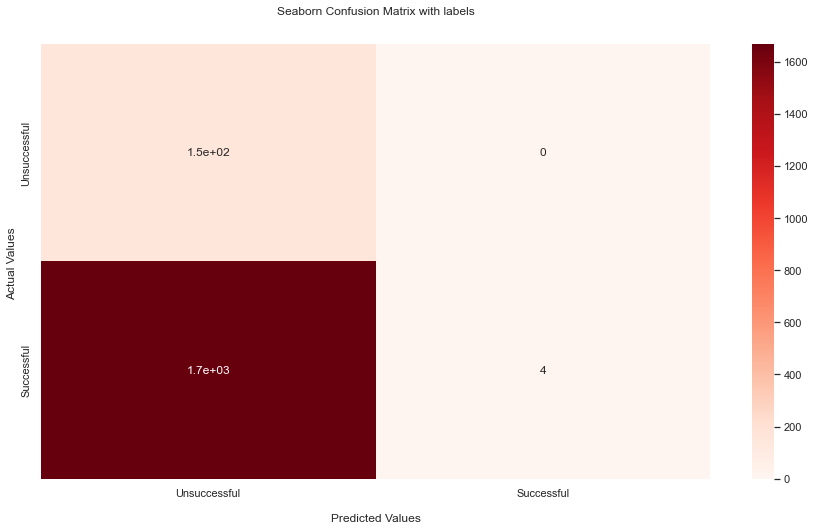

In [130]:
print('Confusion Matrix below:')
ax = sn.heatmap(cf_matrix_train, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Unsuccessful','Successful'])
ax.yaxis.set_ticklabels(['Unsuccessful','Successful'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [131]:
z_pred_test = km.predict(test_T)

z_pred_test
cf_matrix_test = confusion_matrix(test_z, z_pred_test)

print(cf_matrix_test)
print('confuion matrix created')

[[ 34   0]
 [423   0]]
confuion matrix created


Confusion Matrix below:


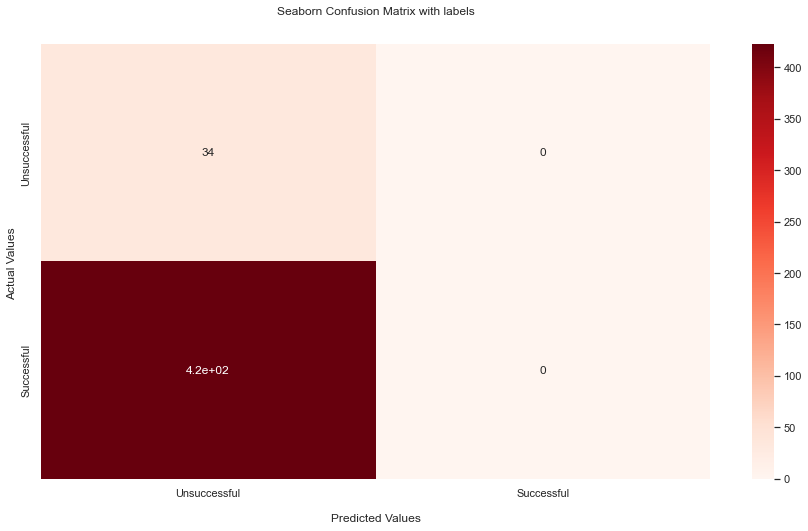

In [132]:
print('Confusion Matrix below:')
ax = sn.heatmap(cf_matrix_test, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Unsuccessful','Successful'])
ax.yaxis.set_ticklabels(['Unsuccessful','Successful'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [133]:
# PART 3: Linear regression to estimate the return of ICOs ICO_Return.csv.

#Estimate 1-week, 1-month, and 6-month returns using the ICOs given in the dataset ICO_Return.csv


In [134]:
ico_return_top = pd.read_csv('ICO_Return.csv')
ico_return_top

,ICO,AR7,AR30,AR180
0,0x,43.507538,21.157102,115.611488
1,holo,1.078509,0.530763,0.814774
2,centrality,-0.229011,-0.039769,-0.528470
3,bittorrent,0.984932,0.533870,-1.058018
4,enjin-coin,-0.082102,-0.369841,6.361898
...,...,...,...,...
660,dos-network,-0.265532,-0.895125,-2.324276
661,status,0.062955,0.136838,-2.188653
662,alphacat,-0.220582,-0.358213,-0.497277
663,eden,-0.336669,-0.571949,-0.550044


In [135]:
ico_return = ico_return_top
ico_return.describe()

,AR7,AR30,AR180
count,663.000000,661.000000,615.000000
mean,0.174369,0.079542,0.119987
std,2.083875,1.527983,5.745982
min,-1.089030,-1.928606,-6.310816
25%,-0.275012,-0.507258,-0.750747
50%,-0.092996,-0.275939,-0.434095
75%,0.129626,0.091158,-0.156387
max,43.507538,21.157102,115.611488


In [136]:
ico_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ICO     665 non-null    object 
 1   AR7     663 non-null    float64
 2   AR30    661 non-null    float64
 3   AR180   615 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.9+ KB


In [137]:
#PART 3

In [138]:
#-------------------------------------------------

In [139]:
# PART 4: .): Identify additional factors that could have an impact on ICO success and/or return. 
#Collect new ICOs after January 2020 and determine the ICO success and/or return. 
#Compare the new model you build with the models in the previous parts.

print('It is important to mention here that we were not able to get the latest2020 data')
print('As all of the ICO token platforms required a pro membership to get the API key')
print('The API key would then allow to fetch latest data for ICOs')
print('However, we found some previous data and some interesting variables that have so far not been considered in our project')
print('we will now work with this new data bearing in mind that Softcap and Hardcap are also included in this new data')
print('Our metric of ICO_success will still be the existence of a Softcap to create a ICO success column like we previously did')

The data has been taken from Github:
User from Github named: PhilippeFerreiraDeSousa
The user completed some whitepaper analysis on ICO success.
url: https://github.com/PhilippeFerreiraDeSousa/ICOSuccessPrediction/blob/master/src/python/coincheckup/dataset.csv
data set name = dataset.csv

In [140]:
ico_new_top = pd.read_csv('newICO.csv')
ico_new_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1748 non-null   object 
 1   Symbol          1748 non-null   object 
 2   Price           1748 non-null   float64
 3   45d             1737 non-null   float64
 4   90d             1726 non-null   float64
 5   200d            1700 non-null   float64
 6   MktCap          1748 non-null   float64
 7   24hVol          1748 non-null   float64
 8   Circ_Supply     1748 non-null   float64
 9   Total_Supply    1739 non-null   float64
 10  Brand_Buzz      1189 non-null   float64
 11  Social          1748 non-null   float64
 12  Avg_volume      1748 non-null   float64
 13  Age_mo          1748 non-null   float64
 14  Winning_months  1747 non-null   float64
dtypes: float64(13), object(2)
memory usage: 205.1+ KB


In [141]:
print('the new dataset newICO we have loaded here has a bunch of variables we can interpret to determine ICO success')
print('for this dataset how will we designate that an ICO is deemed as a success or not?')
print('For this we will use 45d return, if there is a positive return  after 45d of being on the market, the ICO was deemed a success')
print('why did we choose 45d return to determine success?')
print('Because the average duration in Agemo column of our ICOS is 18.3 months')
print('meaning our crypto stays on the market for an average time of 18 months')
print('hence choosing 45 days approx 1.5 months to see where our ICO stands is a feasable metric to judge success in this case')
print('This is due to the absence of Softcap in this data, we cannot just assign a softcap')

the new dataset newICO we have loaded here has a bunch of variables we can interpret to determine ICO success
for this dataset how will we designate that an ICO is deemed as a success or not?
For this we will use 45d return, if there is a positive return  after 45d of being on the market, the ICO was deemed a success
why did we choose 45d return to determine success?
Because the average duration in Agemo column of our ICOS is 18.3 months
meaning our crypto stays on the market for an average time of 18 months
hence choosing 45 days approx 1.5 months to see where our ICO stands is a feasable metric to judge success in this case
This is due to the absence of Softcap in this data, we cannot just assign a softcap


In [142]:
ico_new = ico_new_top
ico_new.isnull().sum()

Name                1
Symbol              1
Price               1
45d                12
90d                23
200d               49
MktCap              1
24hVol              1
Circ_Supply         1
Total_Supply       10
Brand_Buzz        560
Social              1
Avg_volume          1
Age_mo              1
Winning_months      2
dtype: int64

In [143]:
ico_new.MktCap.mean()

125.6264702517162

we will use the Market Cap volume of the ICOs as a success metric. This is to somehow simulate what we did with Amount raised
in part 1 and 2. if the average volume of the ICO is greater than the average then it will be considered a success.

In [144]:
ico_new.dropna(subset = ['Price'], inplace = True)
ico_new['Brand_Buzz'] = ico_new['Brand_Buzz'].replace(np.nan,0)
ico_new.dropna(subset = ['200d'], inplace = True)
ico_new.dropna(subset = ['90d'], inplace = True)
ico_new.dropna(subset = ['45d'], inplace = True)
ico_new.dropna(subset = ['Total_Supply'], inplace = True)

print('NaN rows were dropped in 45d,90d,200d,Total Supply, and Price')

NaN rows were dropped in 45d,90d,200d,Total Supply, and Price


In [145]:
avg = ico_new['MktCap'].values


def success (avg): 
    if avg > 125.6264702517162:
        return 1
    else:
        return 0
suc=[]
for i in range(len(avg)):
    suc.append(success(avg[i]))
suc=np.array(suc)
ico_new['Success']=suc   
ico_new.head()

print('New column Success created based on average volume')
ico_new

New column Success created based on average volume


,Name,Symbol,Price,45d,90d,200d,MktCap,24hVol,Circ_Supply,Total_Supply,Brand_Buzz,Social,Avg_volume,Age_mo,Winning_months,Success
0,0x,ZRX,0.339900,-3.20,-55.79,-71.28,199.98,43.39,588.414,1.000000e+09,100.0,88.0,9.011342e+06,18.0,18.0,1
1,Electroneum,ETN,0.005700,-28.50,-66.60,-51.55,54.15,1.27,9.455,9.454626e+09,100.0,87.0,2.699550e+05,15.0,15.0,0
2,Apollo Currency,APL,0.001500,89.77,11.61,11.61,22.50,1.16,14.685,2.116510e+10,0.0,82.0,9.118270e+05,6.0,6.0,0
3,Zcash,ZEC,76.530000,16.46,-40.57,-58.48,501.00,1.02,6.546,6.546206e+06,100.0,77.0,1.791985e+08,27.0,27.0,1
4,Nano,NANO,1.850000,70.97,-1.62,-22.35,246.63,27.32,133.248,1.332483e+08,0.0,92.0,2.506858e+06,23.0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,Coin2.1,C2,0.000400,25.02,-63.98,-78.13,32.59,0.00,78.246,1.332738e+08,0.0,20.0,6.670000e-02,56.0,56.0,0
1744,Elcoin,EL,0.043500,246.60,126.42,-19.91,487.13,1.36,11.209,2.093529e+07,0.0,15.0,8.900000e+01,33.0,33.0,1
1745,CrevaCoin,CREVA,0.000079,96.32,-38.58,-1.67,2.88,1.58,36.391,6.240391e+09,0.0,21.0,3.400000e+01,43.0,43.0,0
1746,Save and Gain,SANDG,0.000600,-19.37,-38.33,-90.19,1.94,8.74,3.065,3.064800e+06,0.0,19.0,3.333000e-01,40.0,40.0,0


In [146]:
ico_new.isnull().sum()

Name              0
Symbol            0
Price             0
45d               0
90d               0
200d              0
MktCap            0
24hVol            0
Circ_Supply       0
Total_Supply      0
Brand_Buzz        0
Social            0
Avg_volume        0
Age_mo            0
Winning_months    0
Success           0
dtype: int64

we will use the K Means clustering method, and we will use the elbow method to find the optimal number of clusters to determine success.

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_ico_new_cluster = scaler.fit_transform( ico_new[['45d','90d','200d','MktCap','24hVol','Circ_Supply','Total_Supply','Brand_Buzz','Social','Avg_volume','Age_mo','Winning_months']] )
print('Parameters have been scaled')

Parameters have been scaled


Finding Optimal Number of Clusters Using Elbow Method


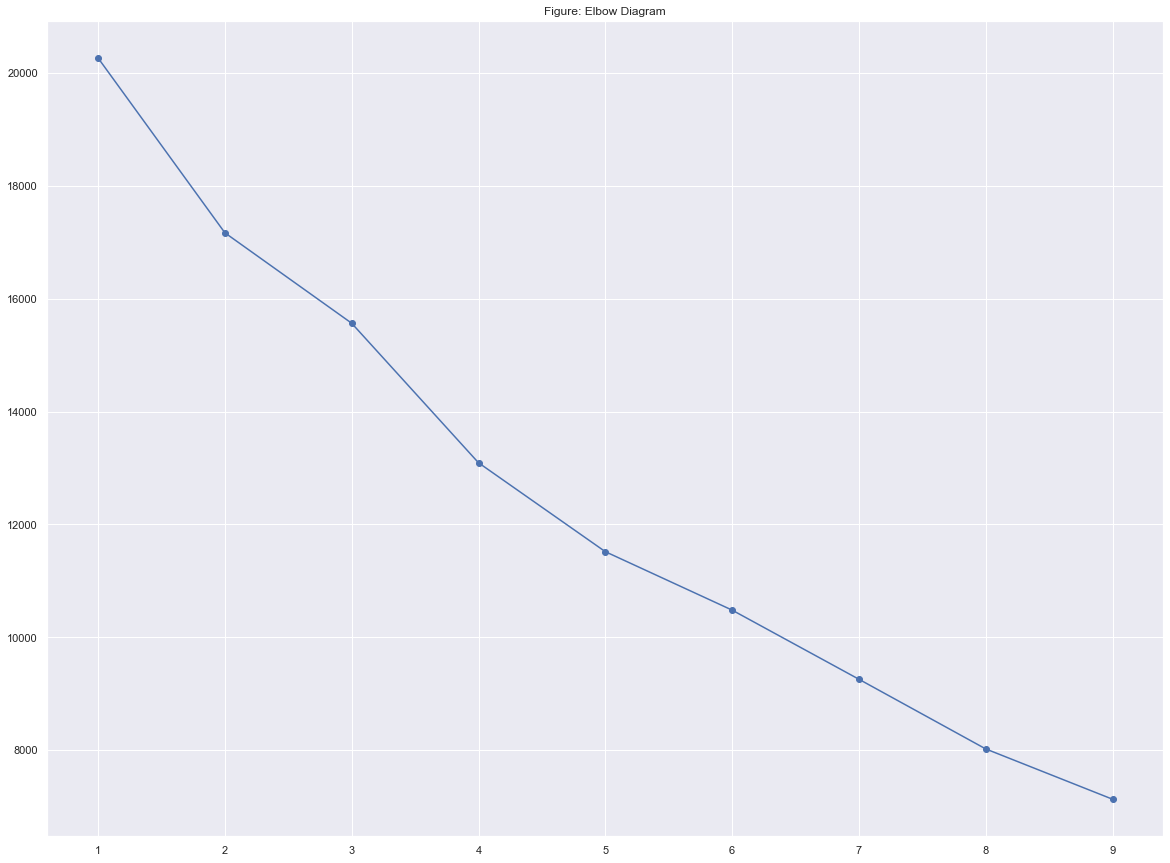

In [148]:
print('Finding Optimal Number of Clusters Using Elbow Method')
cluster_r = range( 1, 10 )
cluster_e = []
for num_clusters in cluster_r:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_ico_new_cluster )
    cluster_e.append( clusters.inertia_ )
plt.figure(figsize=(20,15))
plt.plot( cluster_r, cluster_e, marker = "o" );
plt.title( "Figure: Elbow Diagram");

In [149]:
print('we can see that the elbow is forming at 2 so our K=2')

k = 2
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_ico_new_cluster )
ico_new["clusterid"] = clusters.labels_
print('cluster lables created')

we can see that the elbow is forming at 2 so our K=2
cluster lables created


In [150]:
ico_new[ico_new.clusterid == 0]

,Name,Symbol,Price,45d,90d,200d,MktCap,24hVol,Circ_Supply,Total_Supply,Brand_Buzz,Social,Avg_volume,Age_mo,Winning_months,Success,clusterid
0,0x,ZRX,0.339900,-3.20,-55.79,-71.28,199.98,43.39,588.414,1.000000e+09,100.0,88.0,9.011342e+06,18.0,18.0,1,0
1,Electroneum,ETN,0.005700,-28.50,-66.60,-51.55,54.15,1.27,9.455,9.454626e+09,100.0,87.0,2.699550e+05,15.0,15.0,0,0
2,Apollo Currency,APL,0.001500,89.77,11.61,11.61,22.50,1.16,14.685,2.116510e+10,0.0,82.0,9.118270e+05,6.0,6.0,0,0
3,Zcash,ZEC,76.530000,16.46,-40.57,-58.48,501.00,1.02,6.546,6.546206e+06,100.0,77.0,1.791985e+08,27.0,27.0,1,0
4,Nano,NANO,1.850000,70.97,-1.62,-22.35,246.63,27.32,133.248,1.332483e+08,0.0,92.0,2.506858e+06,23.0,23.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,BitCoal,COAL,0.000900,-70.30,-96.64,-96.64,3.91,37.27,4.500,4.500000e+06,0.0,38.0,3.200000e+01,19.0,19.0,0,0
1729,POLY AI,AI,0.000045,-39.02,-53.28,-77.47,102.70,0.04,2.282,2.900000e+07,0.0,34.0,5.800000e+01,14.0,14.0,0,0
1738,Elysium,ELS,0.002400,294.27,41.40,-61.63,33.51,0.00,14.146,1.414586e+07,0.0,34.0,3.103000e-01,24.0,24.0,0,0
1741,Cannation,CNNC,0.002600,-34.31,-68.35,-79.23,6.49,0.00,2.477,2.476893e+06,0.0,23.0,3.270000e+02,21.0,21.0,0,0


In [151]:
ico_new[ico_new.clusterid == 1]

,Name,Symbol,Price,45d,90d,200d,MktCap,24hVol,Circ_Supply,Total_Supply,Brand_Buzz,Social,Avg_volume,Age_mo,Winning_months,Success,clusterid
5,Dash,DASH,151.590000,65.44,-10.75,-40.02,1.34,579.09,8.810,8.810252e+06,75.0,79.0,1.510973e+08,60.0,60.0,0,1
6,PIVX,PIVX,0.668800,-6.32,-50.03,-64.79,37.98,2.88,56.781,5.678117e+07,0.0,75.0,6.194100e+05,36.0,36.0,0,1
8,Augur,REP,23.510000,163.42,60.75,-21.49,258.63,17.09,11.000,1.100000e+07,50.0,88.0,1.052082e+07,39.0,39.0,1,1
13,NEM,XEM,0.096700,29.91,2.83,-42.67,869.87,107.25,9.000,9.000000e+09,75.0,77.0,1.378132e+07,46.0,46.0,1,1
14,Lisk,LSK,2.210000,44.49,-22.56,-56.09,258.94,10.42,116.973,1.320882e+08,0.0,73.0,2.931173e+06,34.0,34.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,Coin2.1,C2,0.000400,25.02,-63.98,-78.13,32.59,0.00,78.246,1.332738e+08,0.0,20.0,6.670000e-02,56.0,56.0,0,1
1744,Elcoin,EL,0.043500,246.60,126.42,-19.91,487.13,1.36,11.209,2.093529e+07,0.0,15.0,8.900000e+01,33.0,33.0,1,1
1745,CrevaCoin,CREVA,0.000079,96.32,-38.58,-1.67,2.88,1.58,36.391,6.240391e+09,0.0,21.0,3.400000e+01,43.0,43.0,0,1
1746,Save and Gain,SANDG,0.000600,-19.37,-38.33,-90.19,1.94,8.74,3.065,3.064800e+06,0.0,19.0,3.333000e-01,40.0,40.0,0,1


In [152]:
ico_new[ico_new.clusterid == 2]

,Name,Symbol,Price,45d,90d,200d,MktCap,24hVol,Circ_Supply,Total_Supply,Brand_Buzz,Social,Avg_volume,Age_mo,Winning_months,Success,clusterid


In [153]:
ico_features = ico_new.groupby('clusterid').agg( ["mean"] ).reset_index().round(2)
ico_features

,clusterid,Price,45d,90d,200d,MktCap,24hVol,Circ_Supply,Total_Supply,Brand_Buzz,Social,Avg_volume,Age_mo,Winning_months,Success
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,6.71,30.46,-29.57,-51.04,122.81,129.38,147.80,7.515066e+10,33.59,56.41,1583922.73,11.49,11.49,0.25
1,1,98.72,288.49,-0.47,-49.52,148.45,109.89,93.19,1.077545e+11,3.98,39.99,14834955.42,48.35,48.35,0.35


In [154]:
ico_new[ico_new.clusterid == 0].std()

Price             1.725766e+02
45d               2.799447e+02
90d               1.139184e+02
200d              9.834575e+01
MktCap            2.227622e+02
24hVol            2.161432e+02
Circ_Supply       2.253283e+02
Total_Supply      1.489010e+12
Brand_Buzz        3.868130e+01
Social            1.682844e+01
Avg_volume        2.161820e+07
Age_mo            6.039526e+00
Winning_months    6.039526e+00
Success           4.335976e-01
clusterid         0.000000e+00
dtype: float64

In [155]:
ico_new[ico_new.clusterid == 1].std()

Price             1.520011e+03
45d               4.555935e+03
90d               2.740188e+02
200d              9.911949e+01
MktCap            2.178921e+02
24hVol            2.028536e+02
Circ_Supply       1.741673e+02
Total_Supply      1.227912e+12
Brand_Buzz        1.649688e+01
Social            1.601486e+01
Avg_volume        2.162800e+08
Age_mo            1.200651e+01
Winning_months    1.200651e+01
Success           4.781109e-01
clusterid         0.000000e+00
dtype: float64

As we can see the success mean is 25 percent in cluster 0 and 35 percent in cluster 1
the variable Winning months shows its importance. cluster 1 which has an average winning month 4 times that of
cluster 0 has a 10 percent higher success rate.
As predicted the higher market cap cluster 1 shows a higher success rate.
Imporantly total supply also shows its importance, cluster 1 has it to the power 11 and cluster 0 to the power 10
a difference of 1 power. The greater the total supply the more likely is the success of the ICO
Average Volume also shows the same path, a higher average trading volume of the coin shows the higher success rate.
Successful ICOs also tend to show better returns in 45days, 90 days and 200 days.
If they consitently show better returns they are obviously more successful.
Usually price of an ICO does not always indicate a level of success but the dwarf in values cannot be ignored
the results show that ICOs that have a higher price are more successful. The reason behind such an instance?
we can interpret this from Circulation of Supply (Circ_Supply).
higher priced coins usually have a more steady circulation of supply, their circulation is not so volatile and is usually lower
this is proven from the standard deviations shown above.
The standard deviation of Circulation of Supply in cluster 0 is 2.25 and cluster 1 is 1.74
which is a stark difference between the two.
The price standard deviation of Cluster 0 is also higher, indicating its volatile nature and thus lower success mean
a volatile ICO is difficult to interpret with its success, a more stable coin on the other hand like those in cluster 1
show a lower price deviation = a more predictable price pattern.

In [156]:
#Part 3
#we reconciled data from the two data files in order to obtain average returns (1-week, 1-month, 6-month) with the rest of the data
#data was placed into a new excel file
ico_combined_df=pd.read_csv("ICO_Combined.csv", encoding= 'unicode_escape')

In [157]:
ico_combined_df

,ICO,AR7,AR30,AR180,ICO.1,Token,Softcap,Hardcap,Start,End,...,Bonus,Policy,Number of team members,Distributed in ICO,US restriction,Restricted countries,Accepted fiat,Major cryptocurrencies,Presale,Amount raised
0,0x,43.507538,21.157102,115.611488,0x,ZRX,NaN,NaN,8/11/2017,8/15/2017,...,0.0,0,6.0,0.5000,NaN,NaN,0.0,1.0,0.0,24000000.0
1,holo,1.078509,0.530763,0.814774,holo,HOT Token,1239600,20390000.0,3/29/2018,4/28/2018,...,0.0,kyc&whitelist,10.0,0.7500,1.0,"USA, South Korea, China",0.0,1.0,0.0,8120000.0
2,centrality,-0.229011,-0.039769,-0.528470,centrality,CENNZ,NaN,100000000.0,1/15/2018,2/15/2018,...,0.0,0,50.0,0.7000,NaN,NaN,0.0,1.0,0.0,88524000.0
3,bittorrent,0.984932,0.533870,-1.058018,bittorrent,BTT,20000,7200000.0,1/28/2019,1/28/2019,...,0.0,0,20.0,0.0997,1.0,USA,0.0,1.0,1.0,7128000.0
4,enjin-coin,-0.082102,-0.369841,6.361898,enjin-coin,ENJ,17547600,25000000.0,10/3/2017,10/31/2017,...,1.0,0,8.0,0.8000,1.0,USA,0.0,1.0,0.0,23000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,dos-network,-0.265532,-0.895125,-2.324276,dos-network,DOS,NaN,1700000.0,4/11/2019,4/11/2019,...,0.0,0,11.0,NaN,NaN,NaN,0.0,0.0,0.0,1700000.0
661,status,0.062955,0.136838,-2.188653,status,SNT,NaN,NaN,6/20/2017,6/20/2017,...,0.0,0,12.0,NaN,NaN,NaN,0.0,1.0,0.0,107664904.0
662,alphacat,-0.220582,-0.358213,-0.497277,alphacat,ACAT,NaN,NaN,1/12/2018,1/12/2018,...,0.0,0,26.0,0.4000,NaN,NaN,0.0,1.0,0.0,10845000.0
663,eden,-0.336669,-0.571949,-0.550044,eden,EDN,NaN,NaN,5/25/2018,5/25/2018,...,0.0,kyc,15.0,0.3500,NaN,NaN,0.0,1.0,0.0,24000000.0


In [158]:
#Checking for null values
ico_combined_df.isnull().sum()

ICO                         0
AR7                         2
AR30                        4
AR180                      50
ICO.1                       2
Token                       8
Softcap                   388
Hardcap                   160
Start                       2
End                         2
Quarterstart                2
Duration of offering        2
Country                     2
Category                   12
ERC20                       2
Rating                      2
Number of experts           2
Bonus                       2
Policy                      2
Number of team members     19
Distributed in ICO        167
US restriction            431
Restricted countries      433
Accepted fiat               2
Major cryptocurrencies      2
Presale                     2
Amount raised               2
dtype: int64

In [159]:
ico_combined_df

,ICO,AR7,AR30,AR180,ICO.1,Token,Softcap,Hardcap,Start,End,...,Bonus,Policy,Number of team members,Distributed in ICO,US restriction,Restricted countries,Accepted fiat,Major cryptocurrencies,Presale,Amount raised
0,0x,43.507538,21.157102,115.611488,0x,ZRX,NaN,NaN,8/11/2017,8/15/2017,...,0.0,0,6.0,0.5000,NaN,NaN,0.0,1.0,0.0,24000000.0
1,holo,1.078509,0.530763,0.814774,holo,HOT Token,1239600,20390000.0,3/29/2018,4/28/2018,...,0.0,kyc&whitelist,10.0,0.7500,1.0,"USA, South Korea, China",0.0,1.0,0.0,8120000.0
2,centrality,-0.229011,-0.039769,-0.528470,centrality,CENNZ,NaN,100000000.0,1/15/2018,2/15/2018,...,0.0,0,50.0,0.7000,NaN,NaN,0.0,1.0,0.0,88524000.0
3,bittorrent,0.984932,0.533870,-1.058018,bittorrent,BTT,20000,7200000.0,1/28/2019,1/28/2019,...,0.0,0,20.0,0.0997,1.0,USA,0.0,1.0,1.0,7128000.0
4,enjin-coin,-0.082102,-0.369841,6.361898,enjin-coin,ENJ,17547600,25000000.0,10/3/2017,10/31/2017,...,1.0,0,8.0,0.8000,1.0,USA,0.0,1.0,0.0,23000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,dos-network,-0.265532,-0.895125,-2.324276,dos-network,DOS,NaN,1700000.0,4/11/2019,4/11/2019,...,0.0,0,11.0,NaN,NaN,NaN,0.0,0.0,0.0,1700000.0
661,status,0.062955,0.136838,-2.188653,status,SNT,NaN,NaN,6/20/2017,6/20/2017,...,0.0,0,12.0,NaN,NaN,NaN,0.0,1.0,0.0,107664904.0
662,alphacat,-0.220582,-0.358213,-0.497277,alphacat,ACAT,NaN,NaN,1/12/2018,1/12/2018,...,0.0,0,26.0,0.4000,NaN,NaN,0.0,1.0,0.0,10845000.0
663,eden,-0.336669,-0.571949,-0.550044,eden,EDN,NaN,NaN,5/25/2018,5/25/2018,...,0.0,kyc,15.0,0.3500,NaN,NaN,0.0,1.0,0.0,24000000.0


In [160]:
ico_combined_df.isnull().sum()

ICO                         0
AR7                         2
AR30                        4
AR180                      50
ICO.1                       2
Token                       8
Softcap                   388
Hardcap                   160
Start                       2
End                         2
Quarterstart                2
Duration of offering        2
Country                     2
Category                   12
ERC20                       2
Rating                      2
Number of experts           2
Bonus                       2
Policy                      2
Number of team members     19
Distributed in ICO        167
US restriction            431
Restricted countries      433
Accepted fiat               2
Major cryptocurrencies      2
Presale                     2
Amount raised               2
dtype: int64

In [161]:
#replacing the #REF! rows with nan, because it is not convertable to float
ico_combined_df = ico_combined_df.replace('#REF!', np.nan, regex=True)
print('#REF! rows have been replaced with NaN')

ico_combined_df['US restriction'] = ico_combined_df['US restriction'].replace(np.nan,0)
print('replaced nan values with 0 to signify no US restriction')

#changing data type to float to be able to run regression
ico_combined_df['Softcap']= ico_combined_df['Softcap'].astype('float')
ico_combined_df['Hardcap']= ico_combined_df['Hardcap'].astype('float')
print('Softcap and Hardcap have been converted to float')

#replacing the NaN values in Country with None, and so we have another country type = None
# Meaning no country is assigned to it
ico_combined_df['Country'] = ico_combined_df['Country'].replace('', np.nan, regex=True)
ico_combined_df['Country'] = ico_combined_df['Country'].replace(np.nan,'None')
ico_combined_df['Category'] = ico_combined_df['Category'].replace(np.nan,'None')
print('replaced empty Country rows with None to signify no designated country--> A new country type = None')

#REF! rows have been replaced with NaN
replaced nan values with 0 to signify no US restriction
Softcap and Hardcap have been converted to float
replaced empty Country rows with None to signify no designated country--> A new country type = None


In [162]:
#Treating the null values:

# we will now replace nan values in AR7 with mean 
ico_combined_df["AR7"].fillna(ico_combined_df['AR7'].mean(),inplace=True)
print('replaced NaN values in AR7 with Average AR7')

# we will now replace nan values in AR30 with mean 
ico_combined_df["AR30"].fillna(ico_combined_df['AR30'].mean(),inplace=True)
print('replaced NaN values in AR30 with Average AR30')

# we will now replace nan values in AR180 with mean 
ico_combined_df["AR180"].fillna(ico_combined_df['AR180'].mean(),inplace=True)
print('replaced NaN values in AR180 with Average AR180')


# if there is no minimum amount---> The project will not be launched
ico_combined_df['Softcap'] = ico_combined_df['Softcap'].replace(np.nan,0)
ico_combined_df['Hardcap'] = ico_combined_df['Hardcap'].replace(np.nan,0)
print('replaced empty softcap and hardcap rows with 0')

# we will now replace nan values in Duration with mean 
ico_combined_df["Duration of offering"].fillna(ico_combined_df['Duration of offering'].mean(),inplace=True)
print('replaced NaN values in Duration with average duration')

#we will now replace nan values in Teammembers and Experts with mean 
ico_combined_df["Number of team members"].fillna(ico_combined_df['Number of team members'].mean(),inplace=True)
ico_combined_df["Number of experts"].fillna(ico_combined_df['Number of experts'].mean(),inplace=True)
print('replaced nan values in experts and teammembers with average number of teammembers and experts')

#we will now replace nan values in Rating with mean 
ico_combined_df["Rating"].fillna(ico_combined_df['Rating'].mean(),inplace=True)
print('replaced NaN values in Rating with average Rating')

#we will now replace nan values in Distribution with mean 
ico_combined_df["Distributed in ICO"].fillna(ico_combined_df['Distributed in ICO'].mean(),inplace=True)
print('replaced NaN values in Distribution with average Distribution')

#replaced the blank token rows with nan 
ico_combined_df['Token'] = ico_combined_df['Token'].replace('', np.nan, regex=True)
# now we dropped the nan rows
ico_combined_df.dropna(subset = ['Token'], inplace=True)
print('dropped 26 rows in Token')

#we will replace the NaN values in Restriced countries with "None" because:
# we take the underlying assumption that NaN for restricted countries = NO Restricted countries
ico_combined_df['Restricted countries'] = ico_combined_df['Restricted countries'].replace(np.nan,'None')
print('replaced nan values with "None" to signify no country is restricted')

# we will replace the NaN value in Amount Raised with the mean of the amount raised of Country---> Russia
#because the data row is that of Russia, the most accurate mean we can add is that of russia.
#ico_data_edit['Restricted_Countries'] = ico_data_edit['Restricted_Countries'].replace(np.nan,9800000.0)


replaced NaN values in AR7 with Average AR7
replaced NaN values in AR30 with Average AR30
replaced NaN values in AR180 with Average AR180
replaced empty softcap and hardcap rows with 0
replaced NaN values in Duration with average duration
replaced nan values in experts and teammembers with average number of teammembers and experts
replaced NaN values in Rating with average Rating
replaced NaN values in Distribution with average Distribution
dropped 26 rows in Token
replaced nan values with "None" to signify no country is restricted


In [163]:
#Confirming there are no remaining null values
ico_combined_df.isnull().sum()

ICO                       0
AR7                       0
AR30                      0
AR180                     0
ICO.1                     0
Token                     0
Softcap                   0
Hardcap                   0
Start                     0
End                       0
Quarterstart              0
Duration of offering      0
Country                   0
Category                  0
ERC20                     0
Rating                    0
Number of experts         0
Bonus                     0
Policy                    0
Number of team members    0
Distributed in ICO        0
US restriction            0
Restricted countries      0
Accepted fiat             0
Major cryptocurrencies    0
Presale                   0
Amount raised             0
dtype: int64

In [164]:
#Now conducting linear regression on the data
X_features = ['ICO','AR7','AR30','AR180','IC0.1','Token','Softcap','Hardcap','Start','End','Quarterstart',"Duration of offering","Country","Category","ERC20","Rating","Number of experts","Bonus","Policy","Number of team members","Distributed in ICO", "US Restriction","Restricted countries","Accepted fiat","Major cryptocurrencies","Presale","Amount raised"] 
X_df = salary_df[X_features]
X = sm.add_constant(X_df)
Y = salary_df['Salary']

NameError: name 'salary_df' is not defined

In [ ]:
#Creating a new column based on Success of the IPO in relation to amount raised and the softcap

ico_combined_df["Amount_raised"]=ico_combined_df["Amount raised"]

soft = ico_combined_df.Softcap.values
amt = ico_combined_df.Amount_raised.values

def success (soft,amt): 
    if soft > 0 or amt> 500000:
        return 1
    else:
        return 0
suc=[]
for i in range(len(soft)):
    suc.append(success(soft[i],amt[i]))
suc=np.array(suc)
ico_combined_df['Success']=suc   
ico_combined_df.head()

print('New column Success created based on Softcap and Amount_Raised')

In [ ]:
ico_regression=""

In [ ]:
#Now conducting linear regression:
X_features = ['Age', 'MBA'] 
X_df = salary_df[X_features]
X = sm.add_constant(X_df)
Y = salary_df['Salary']

In [ ]:
#Creating a new dataframe and renaming columns for regression
ico_reg = pd.DataFrame()

ico_reg['ICO'] = ico_combined_df['ICO']
ico_reg['AR7'] = ico_combined_df['AR7']
ico_reg['AR30'] = ico_combined_df['AR30']
ico_reg['AR180'] = ico_combined_df['AR180']
ico_reg['Token'] = ico_combined_df['Token']
ico_reg['Softcap'] = ico_combined_df['Softcap']
ico_reg['Hardcap'] = ico_combined_df['Hardcap']
ico_reg['Start'] = ico_combined_df['Start']
ico_reg['End'] = ico_combined_df['End']
ico_reg['Quarterstart'] = ico_combined_df['Quarterstart']
ico_reg['Duration'] = ico_combined_df['Duration of offering']
ico_reg['Country'] = ico_combined_df['Country']
ico_reg['Category'] = ico_combined_df['Category']
ico_reg['ERC20'] = ico_combined_df['ERC20']
ico_reg['Rating'] = ico_combined_df['Rating']
ico_reg['#Experts'] = ico_combined_df['Number of experts']
ico_reg['Bonus'] = ico_combined_df['Bonus']
ico_reg['Policy'] = ico_combined_df['Policy']
ico_reg['#Teammembers'] = ico_combined_df['Number of team members']
ico_reg['Distribution'] = ico_combined_df['Distributed in ICO']
ico_reg['US_Restriction'] = ico_combined_df['US restriction']
ico_reg['Restricted_Countries'] = ico_combined_df['Restricted countries']
ico_reg['Accepted_fiat'] = ico_combined_df['Accepted fiat']
ico_reg['Major_Currencies'] = ico_combined_df['Major cryptocurrencies']
ico_reg['Presale'] = ico_combined_df['Presale']
ico_reg['Amount_Raised'] = ico_combined_df['Amount raised']
ico_reg['Success']=ico_combined_df['Success']
ico_reg


In [ ]:
#Conducting regression

X_features_combined = ['Softcap','Hardcap','Duration','ERC20','Rating','#Experts','Bonus','#Teammembers','Distribution','US_Restriction','Accepted_fiat','Major_Currencies','Presale','Amount_Raised'] 
X_df_combined = ico_reg[X_features]
Xcombined = sm.add_constant(X_df)
Ycombined = ico_reg['Success']
X_df_combined =pd.get_dummies(X_df, drop_first=True)
X_df_combined

In [ ]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(Xcombined, Ycombined, test_size = 0.4, random_state = 11)

In [ ]:
ico_model = sm.OLS(y_train_combined, X_train_combined).fit()

In [ ]:
ico_model = sm.OLS(y_train_combined, X_train_combined).fit()

In [ ]:
print(ico_model.params)

In [ ]:
ico_model.summary2()

In [ ]:
#v1 drop Duration first
X_train_combined_2= X_train_combined.drop('Duration', axis = 1)
ico_model_2 = sm.OLS(y_train_combined, X_train_combined_2).fit()
ico_model_2.summary2()

In [ ]:
#v1 drop ERC20
X_train_combined_3= X_train_combined_2.drop('ERC20', axis = 1)
ico_model_3 = sm.OLS(y_train_combined, X_train_combined_3).fit()
ico_model_3.summary2()

In [ ]:
def backward_elimination(model, y, X, features):
    while True:
        if max(model.pvalues[features]) > 0.05:
            drop_variable = model.pvalues[model.pvalues == max(model.pvalues[features])]
            print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
            X = X.drop(columns = [drop_variable.index[0]])
            features = features.drop(drop_variable.index[0])
            model= sm.OLS(y, X).fit()
        else:
            print("All p values less than 0.05")
            return features
            break;
        
significant_Features = backward_elimination(ico_model, y_train_combined, X_train_combined, X_df.columns)
print(significant_Features)

X_train = sm.add_constant(X_train_combined[significant_Features])
icomodel2 = sm.Logit(y_train_combined, X_train_combined)
icomodel2 = icomodel2.fit()
icomodel2.summary2()